<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DataAnalysis/blob/main/02.%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94/%ED%95%B4%EC%84%A4/ch02_11_%EC%8B%A4%EC%A0%84_%EC%9E%AC%EC%A0%95%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.11. 실전-재정데이터 시각화 경진대회

---

* 날짜:
* 이름:

[재정 데이터 시각화 경진대회](https://dacon.io/competitions/official/235767/overview/description)

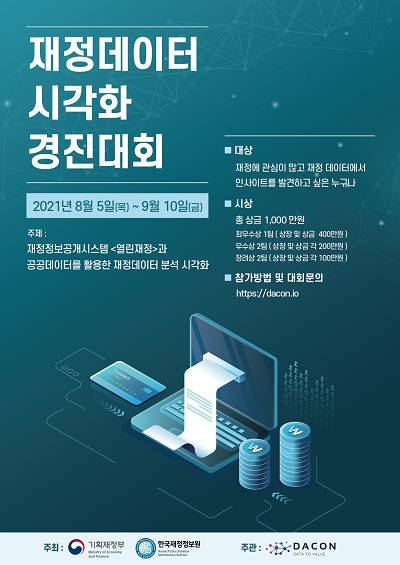

## Step 1 : 시작 해보기
---

**주제** : 연도에 따른 분야별 재정지출 추이 및 비율 시각화

### | **환경세팅**

* matplotlib에서 사용할 수 있는 폰트 확인

In [ ]:
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

* 한글 폰트 설치

In [ ]:
!sudo apt-get install -y fonts-nanum # 폰트 설치
!sudo fc-cache -fv # 캐쉬 갱신 
!rm ~/.cache/matplotlib -rf # matplotlib 캐쉬 제거

* 라이브러리 임포트 및 세팅

In [ ]:
import glob, os # 파일 경로에 관한 라이브러리
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.set(font_scale=1.2, style='white', palette='tab20') 
plt.rcParams['font.family'] = 'NanumGothic' # 폰트 설정

* 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


* 라이브러리 소개 : `tree` : 디렉토리 트리구조를 확인할 수 있다.

In [ ]:
! sudo apt-get install tree

### | **데이터 확보**

데이터를 처리 하기 전 Step1 에서 진행 할 주제를 정의합니다. 

* 경로 설정

In [ ]:
df_path = '/content/gdrive/MyDrive/[ Work ] NCS/[훈련과정] 딥러닝 프레임워크 실무/과정02.데이터분석/02.데이터시각화/분야별 재정지출'

* 트리를 이용해 하위 폴더 구조 확인

In [ ]:
! tree  '/content/gdrive/MyDrive/[ Work ] NCS/[훈련과정] 딥러닝 프레임워크 실무/과정02.데이터분석/02.데이터시각화/분야별 재정지출'

* 하위폴더 확인 및 정의

In [ ]:
fields = os.listdir(df_path)
fields = ['국토 및 지역개발 분야',
 '국방 분야',
 '보건 분야',
 '교육 분야',
 '과학기술 분야',
 '문화 및 관광 분야',
 '사회복지 분야',
 '농림수산 분야',
 '교통 및 물류 분야',
 '공공질서 및 안전 분야',
 '통신 분야',
 '일반·지방행정 분야',
 '환경 분야',
 '산업·중소기업 및 에너지 분야',
 '통일·외교 분야']

* 분야별 데이터 프레임 확보

In [ ]:
dfs = []
for field in fields:
  print(field, end=' :')

  f = f'{df_path}/{field}/{field} 재정구조.CSV'
  if os.path.isfile(f):
    dfs.append(pd.read_csv(f, encoding='CP949'))
    print('Y')
  else: print('N')

국토 및 지역개발 분야 :Y
국방 분야 :Y
보건 분야 :Y
교육 분야 :Y
과학기술 분야 :Y
문화 및 관광 분야 :Y
사회복지 분야 :Y
농림수산 분야 :Y
교통 및 물류 분야 :Y
공공질서 및 안전 분야 :Y
통신 분야 :Y
일반·지방행정 분야 :Y
환경 분야 :Y
산업·중소기업 및 에너지 분야 :Y
통일·외교 분야 :Y


* 각 데이터 프레임 확인

In [ ]:
for field, df in zip(fields, dfs):
  print(field)
  print(df)

국토 및 지역개발
     연도   기준  합계예산(억원)  부문당 예산(억원)  프로그램당 예산(억원)  단위사업당 예산(억원)  세부사업당 예산(억원)
0  2015   결산     45298       15099          3775           755           176
1  2016   결산     39793       13264          3316           674           169
2  2017   결산     34732       11577          2894           631           165
3  2018   결산     36790       12263          3066           708           168
4  2019   결산     43509       14503          3626           806           193
5  2020  본예산     40467       13489          3372           749           186
6  2021  본예산     50847       16949          4237           959           243
국방
     연도   기준  합계예산(억원)  부문당 예산(억원)  프로그램당 예산(억원)  단위사업당 예산(억원)  세부사업당 예산(억원)
0  2015   결산    355926       88982         11481          2579           716
1  2016   결산    368460       92115         11165          2507           746
2  2017   결산    379425       94856         11498          2730           799
3  2018   결산    412322      103081         15859          3890 

### | **데이터 처리**

* 데이터 통합

In [ ]:
df = pd.concat(dfs, axis=0, ignore_index=True)
df.head()

,연도,기준,합계예산(억원),부문당 예산(억원),프로그램당 예산(억원),단위사업당 예산(억원),세부사업당 예산(억원)
0,2015,결산,45298,15099,3775,755,176
1,2016,결산,39793,13264,3316,674,169
2,2017,결산,34732,11577,2894,631,165
3,2018,결산,36790,12263,3066,708,168
4,2019,결산,43509,14503,3626,806,193


* 통합된 데이터프레임에 '분야' 컬럼 추가 

In [ ]:
fields

['국토 및 지역개발',
 '국방',
 '보건',
 '교육',
 '과학기술',
 '문화 및 관광',
 '사회복지',
 '농림수산',
 '교통 및 물류',
 '공공질서 및 안전',
 '통신',
 '일반 지방행정',
 '환경',
 '산업 중소기업 및 에너지',
 '통일 외교']

In [ ]:
fields = ['국토 및 지역개발',
          '국방',
          '보건',
          '교육',
          '과학기술',
          '문화 및 관광',
          '사회복지', 
          '농림수산',
          '교통 및 물류',
          '공공질서 및 안전',
          '통신',
          '일반 지방행정',
          '환경',
          '산업 중소기업 및 에너지',
          '통일 외교'
          ]
df['분야'] = [field for field in fields for i in range(7)]
df.head()

,연도,기준,합계예산(억원),부문당 예산(억원),프로그램당 예산(억원),단위사업당 예산(억원),세부사업당 예산(억원),분야
0,2015,결산,45298,15099,3775,755,176,국토 및 지역개발
1,2016,결산,39793,13264,3316,674,169,국토 및 지역개발
2,2017,결산,34732,11577,2894,631,165,국토 및 지역개발
3,2018,결산,36790,12263,3066,708,168,국토 및 지역개발
4,2019,결산,43509,14503,3626,806,193,국토 및 지역개발


* 데이터프레임 요약

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   연도            105 non-null    int64 
 1   기준            105 non-null    object
 2   합계예산(억원)      105 non-null    int64 
 3   부문당 예산(억원)    105 non-null    int64 
 4   프로그램당 예산(억원)  105 non-null    int64 
 5   단위사업당 예산(억원)  105 non-null    int64 
 6   세부사업당 예산(억원)  105 non-null    int64 
 7   분야            105 non-null    object
dtypes: int64(6), object(2)
memory usage: 6.7+ KB


### | **데이터 시각화**

* `groupby`로 연도별 총 예산 추이 시각화

      합계예산(억원)  부문당 예산(억원)  프로그램당 예산(억원)  단위사업당 예산(억원)  세부사업당 예산(억원)
연도                                                                  
2015   3718699      726233        100414         19585          7456
2016   3843609      747485        103971         21269          8581
2017   4013554      773358        107389         22013          8849
2018   4278467      819050        116866         24774          9434
2019   4741664      838806        134290         30108         10191
2020   5093138      902650        145399         32467         10738
2021   5409056      944549        152126         33583         10635


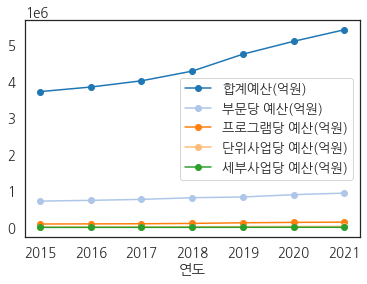

In [ ]:
gru = df.groupby('연도').sum().iloc[1:]
print(gru)
gru.plot(marker='o')

* 피벗테이블로 시각화하기

In [ ]:
piv = pd.pivot_table(data=df, index='분야', columns='연도', values='합계예산(억원)', sort=False)
piv.style.background_gradient()

연도,2014,2015,2016,2017,2018,2019,2020,2021
분야,,,,,,,,
국토 및 지역개발,nan,45298.000000,39793.000000,34732.000000,36790.000000,43509.000000,40467.000000,50847.000000
국방,nan,355926.000000,368460.000000,379425.000000,412322.000000,449063.000000,486935.000000,514176.000000
보건,nan,111881.000000,104749.000000,102808.000000,106925.000000,119351.000000,135219.000000,146968.000000
교육,nan,524707.000000,553716.000000,591921.000000,643411.000000,705300.000000,726344.000000,712076.000000
과학기술,nan,65070.000000,66769.000000,70076.000000,69809.000000,72507.000000,82413.000000,89798.000000
문화 및 관광,61963.000000,67212.000000,69327.000000,63239.000000,72003.000000,80181.000000,84816.000000,nan
사회복지,nan,1070096.000000,1124165.000000,1210037.000000,1360380.000000,1548464.000000,1670211.000000,1850459.000000
농림수산,nan,191130.000000,187369.000000,193670.000000,195821.000000,204327.000000,215153.000000,226557.000000
교통 및 물류,nan,208920.000000,190500.000000,184756.000000,152515.000000,162935.000000,191844.000000,214243.000000


* 연도별 합계예산 추이

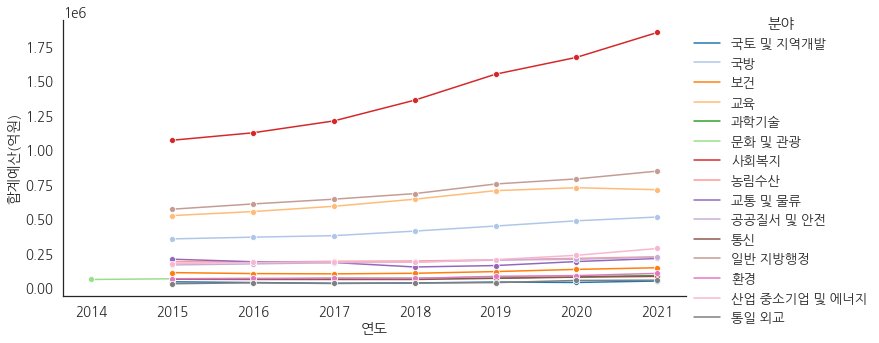

In [ ]:
_=sns.relplot(data=df, x='연도', y='합계예산(억원)', 
            hue='분야',marker='o', kind='line', palette='tab20',
            aspect=2, )

* 연도에 따른 분야별 파이차트

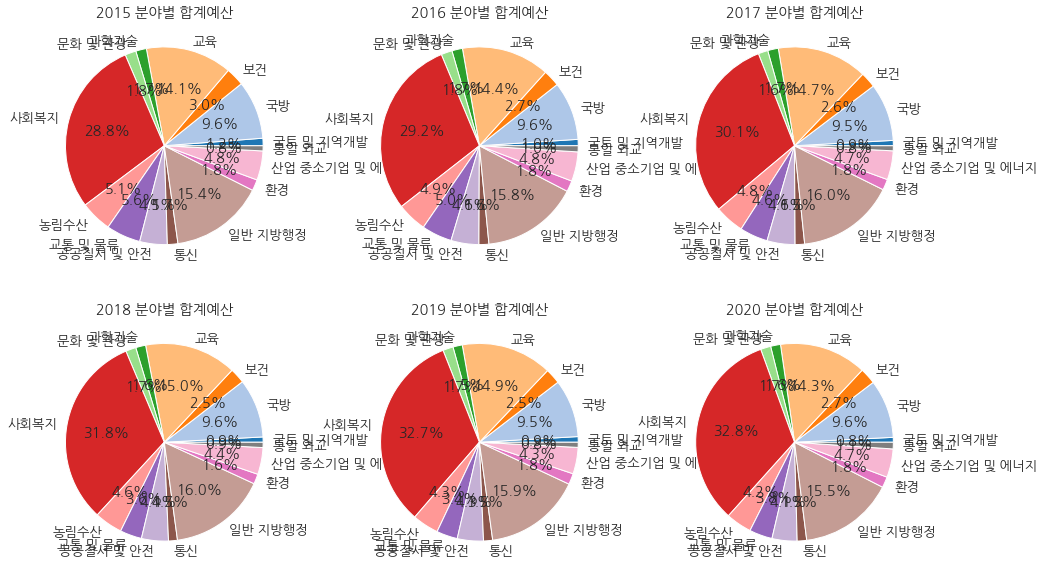

In [ ]:
fig, axes = plt.subplots(2,3,figsize=(16,10))
axes = axes.flatten()
for y,ax in zip(range(2015,2021), axes):
  ax.set_title(f'{y} 분야별 합계예산')
  ax.pie(piv.loc[:,y], labels=fields, autopct='%.1f%%')

  * 정리하기

      - 6년간 전체 예산 금액은 꾸준히 증가
      - 6년간 사회복지의 재정 비율이 꾸준히 증가하고 있다.
      - 사회복지, 교육, 일반 지방행정을 이어 국방이 큰 비중을 차지하고 있다.
      

## Step 2 : 따라 해보기
---

https://dacon.io/competitions/official/235767/codeshare/3238?page=1&dtype=random

## Step 3: 스스로 해보기
---

* 주제: 